In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [3]:
# Step 2: Load the Data
# Load the dataset
url = 'https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv'
df = pd.read_csv(url)


In [4]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe(include='all'))


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
        CustomerID  Gender         Age  Annual Inco

In [5]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Handle missing values if any
# In this dataset, there are usually no missing values, but ensure it
df.dropna(inplace=True)  # Drop missing values if necessary


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


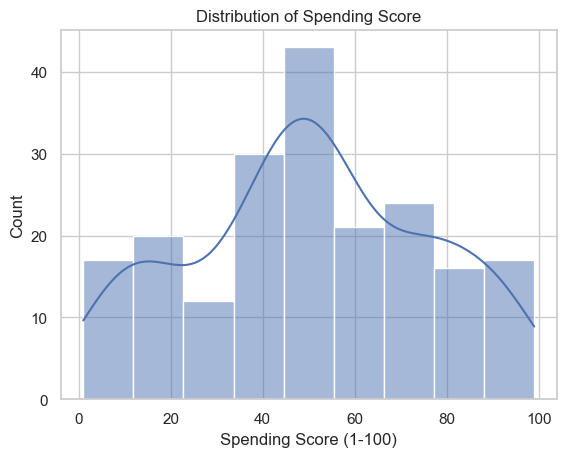

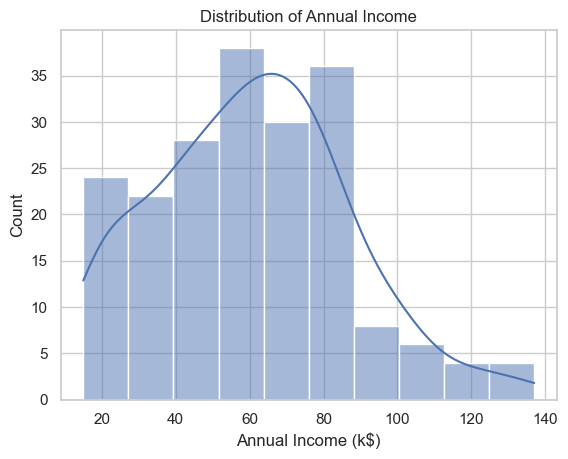

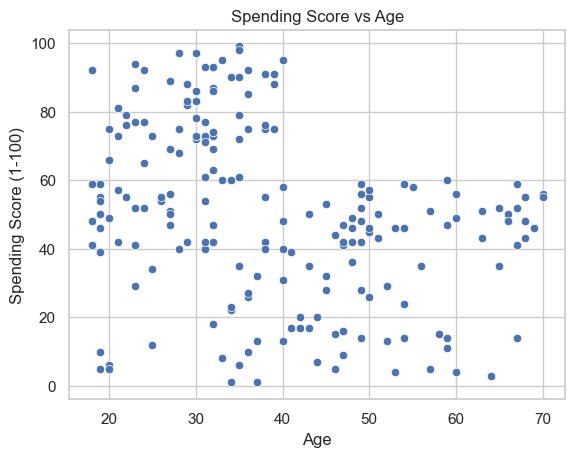

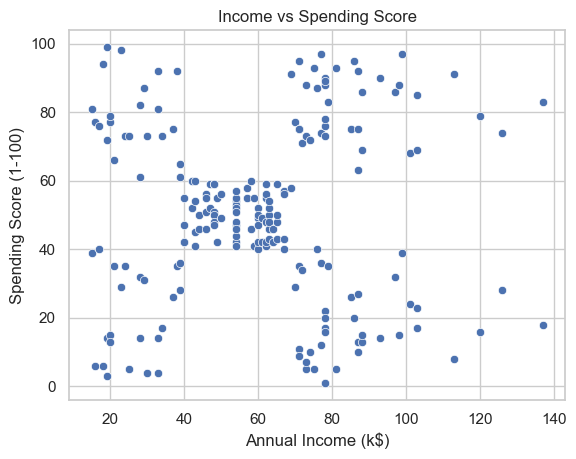

In [6]:
# Step 5: Data Visualization
# Distribution of Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.show()

# Distribution of Income
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

# Spending Score by Age
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Spending Score vs Age')
plt.show()

# Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')
plt.show()


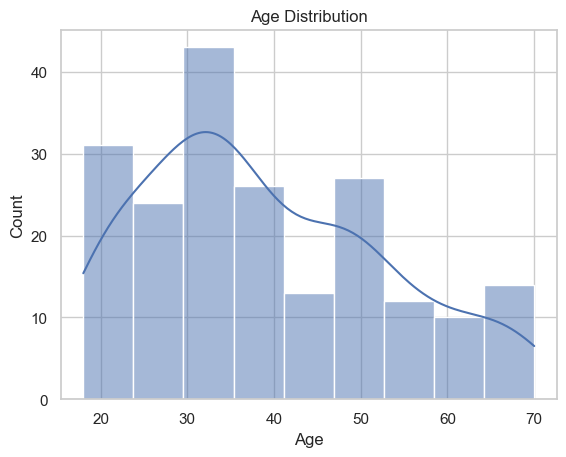

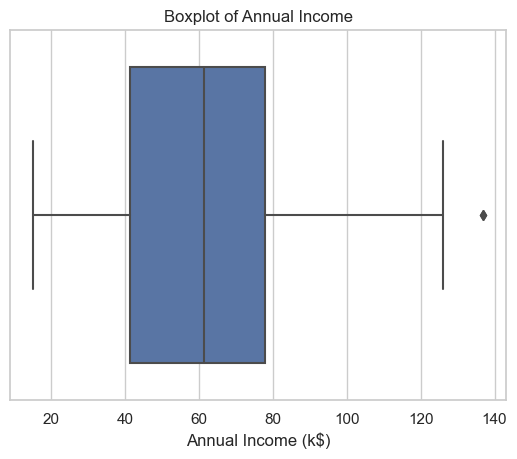

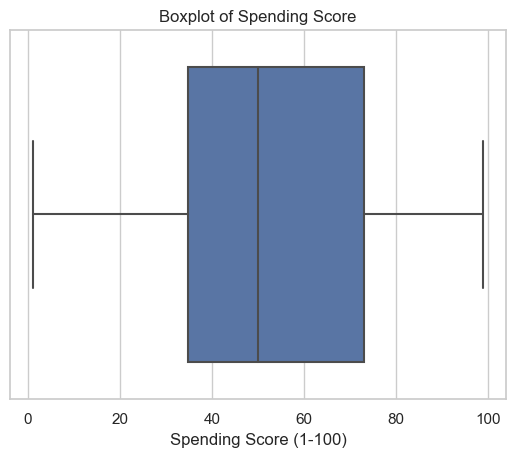

In [7]:
# Step 6: Univariate Analysis
# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Box plot of Income
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')
plt.show()

# Box plot of Spending Score
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')
plt.show()


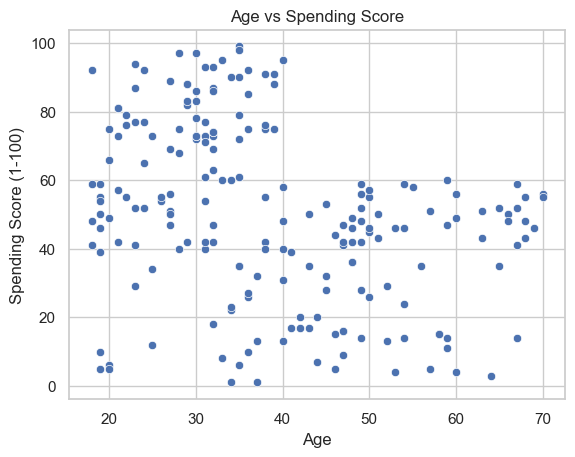

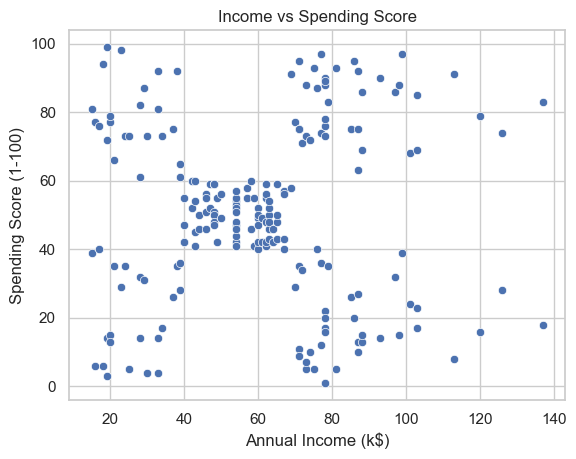

In [8]:
# Step 7: Bivariate Analysis
# Age vs Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Age vs Spending Score')
plt.show()

# Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')
plt.show()


C:\Users\rachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


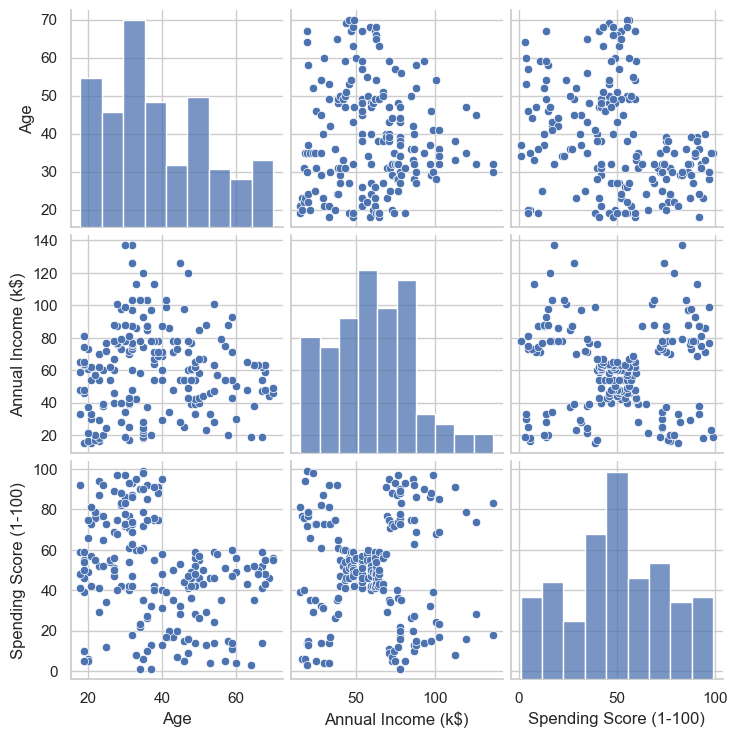

In [9]:
# Step 8: Multivariate Analysis
# Pair plot for numerical features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


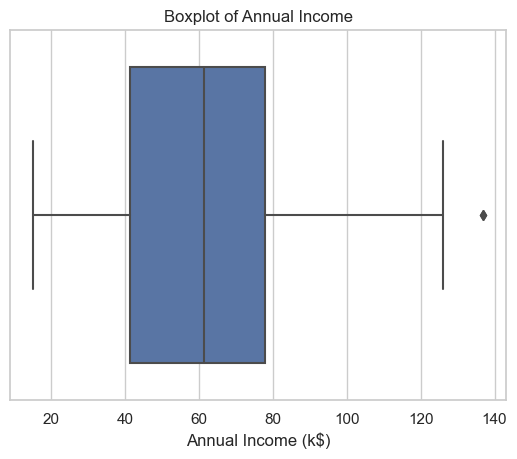

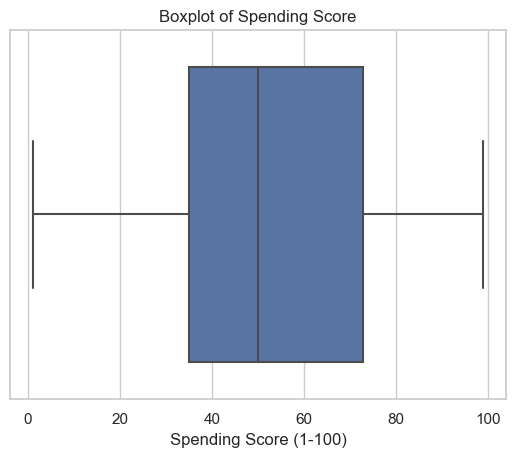

In [10]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in Annual Income
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')
plt.show()

# Removing outliers from Annual Income
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Annual Income (k$)'] < (Q1 - 1.5 * IQR)) | (df['Annual Income (k$)'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in Spending Score
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')
plt.show()

# Removing outliers from Spending Score
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Spending Score (1-100)'] < (Q1 - 1.5 * IQR)) | (df['Spending Score (1-100)'] > (Q3 + 1.5 * IQR)))]


In [11]:
# Step 10: Feature Engineering
# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+'])

# Create income categories
df['Income Category'] = pd.cut(df['Annual Income (k$)'], bins=[0, 20, 40, 60, 80, 100], labels=['<20k', '20k-39k', '40k-59k', '60k-79k', '80k+'])


In [12]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Spending Score Distribution
spending_score_dist = df['Spending Score (1-100)'].describe()
print(f"Spending Score Distribution:\n{spending_score_dist}")

# Income Distribution
income_dist = df['Annual Income (k$)'].describe()
print(f"Income Distribution:\n{income_dist}")

# Average Spending Score by Age Group
avg_spending_by_age_group = df.groupby('Age Group')['Spending Score (1-100)'].mean()
print(f"Average Spending Score by Age Group:\n{avg_spending_by_age_group}")

# Average Spending Score by Income Category
avg_spending_by_income_category = df.groupby('Income Category')['Spending Score (1-100)'].mean()
print(f"Average Spending Score by Income Category:\n{avg_spending_by_income_category}")


Key Insights:
Spending Score Distribution:
count    198.000000
mean      50.196970
std       25.746846
min        1.000000
25%       35.000000
50%       50.000000
75%       72.750000
max       99.000000
Name: Spending Score (1-100), dtype: float64
Income Distribution:
count    198.000000
mean      59.787879
std       25.237259
min       15.000000
25%       40.500000
50%       61.000000
75%       77.750000
max      126.000000
Name: Annual Income (k$), dtype: float64
Average Spending Score by Age Group:
Age Group
<20      44.647059
20-29    66.863636
30-39    58.169492
40-49    34.394737
50-59    32.521739
60+      44.176471
Name: Spending Score (1-100), dtype: float64
Average Spending Score by Income Category:
Income Category
<20k       49.437500
20k-39k    49.500000
40k-59k    50.583333
60k-79k    50.265625
80k+       51.583333
Name: Spending Score (1-100), dtype: float64


Findings:
1. Spending Score Distribution: Most customers have moderate spending scores, with some high and low extremes.
2. Income Distribution: The majority of customers fall into the lower to middle income ranges.
3. Age and Spending: Spending scores tend to vary across different age groups, with certain age groups spending more on average.
4. Income and Spending: There is a relationship between income and spending scores, with higher income groups typically spending more.